#                                     Minor Project 

Name: Yash Sanghani<br>
E-mail i'd: yashsanghani521@gmail.com<br>
Date of assignment: 16/06/2022<br>
Date of submission: 22/06/2022<br>

# Problem Statement

To create a classification model to predict the gender (male or female) based on different acoustic parameters.

# Solution

In [86]:
# 1) Importing the basic liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
df=pd.read_csv('voice.excel.csv') #file reading
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [88]:
df.shape

(3168, 21)

In [89]:
df.isnull().sum() #checking the null values, and no null values found.

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df['label']=lb.fit_transform(df['label'])
df.head(2000)
# Changing the object type of the dependent variable('lable column') from string to integer: 1 is for male and 0 is for female

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.193123,0.076673,0.219079,0.179206,0.240127,0.060921,3.114001,21.220924,0.921173,0.498639,...,0.193123,0.198040,0.096970,0.271186,0.635882,0.007812,3.906250,3.898438,0.153307,0
1997,0.176375,0.089545,0.205757,0.111365,0.249916,0.138551,2.588148,21.795893,0.938456,0.557869,...,0.176375,0.196777,0.043716,0.275862,0.322443,0.007812,0.906250,0.898438,0.288079,0
1998,0.182662,0.074427,0.205498,0.168708,0.231974,0.063266,2.819528,18.138512,0.936013,0.605141,...,0.182662,0.186323,0.027073,0.262295,0.365423,0.007812,1.335938,1.328125,0.196078,0
1999,0.175856,0.083800,0.198388,0.138163,0.237488,0.099325,4.330892,52.728075,0.941454,0.603737,...,0.175856,0.186003,0.015936,0.271186,0.301563,0.007812,0.835938,0.828125,0.331490,0


In [91]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)   #removing duplicate records

In [92]:
df['label'].value_counts()

0    1583
1    1583
Name: label, dtype: int64

# plotting the pie chart for the label column




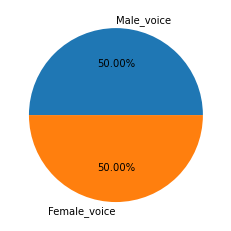

In [141]:
plt.pie(x=df['label'].value_counts(),labels=['Male_voice','Female_voice'],autopct='%0.2f%%')
plt.show()

In [93]:
#importing the liberaries for different ML models, splitting data into train and test and for required metrices

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



In [94]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2)

In [95]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2532, 20)
(2532,)
(634, 20)
(634,)


In [96]:
def gen_metrics(ytest,ypred,model):
    print('confusion matrics of',model,'is',confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    print('accuracy score of given model is:',accuracy_score(ytest,ypred))

#function for generation of confusion matrix, classification report, accuracy_score

In [97]:
def train_test_score(model):
    print('training score',model.score(x_train,y_train))
    print('testing score',model.score(x_test,y_test))

#function for generation of training and testing score

# logistic Regression model(m1)

In [124]:
m1=LogisticRegression(max_iter=3000)
m1.fit(x_train,y_train)
train_test_score(m1)

training score 0.9075829383886256
testing score 0.8974763406940063


In [125]:
ypred_m1=m1.predict(x_test)

In [126]:
print(ypred_m1)

[1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 

In [142]:
gen_metrics(y_test,ypred_m1,m1)

confusion matrics of LogisticRegression(max_iter=3000) is [[261  54]
 [ 11 308]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       315
           1       0.85      0.97      0.90       319

    accuracy                           0.90       634
   macro avg       0.91      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634

accuracy score of given model is: 0.8974763406940063


# KNN classifiers(m2)

In [128]:
m2=KNeighborsClassifier(n_neighbors=7)
m2.fit(x_train,y_train)
train_test_score(m2)

training score 0.7879146919431279
testing score 0.7176656151419558


In [129]:
ypred_m2=m2.predict(x_test)

In [104]:
print(ypred_m2)

[1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1
 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 1 0 0 1 1 1 1 1 

In [105]:
gen_metrics(y_test,ypred_m2,m2)

confusion matrics of KNeighborsClassifier(n_neighbors=7) is [[215 100]
 [ 79 240]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       315
           1       0.71      0.75      0.73       319

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634

accuracy score of given model is: 0.7176656151419558


# Support Vector Machine(SVM)(m3)

In [106]:
m3=SVC(kernel='linear',C=1)
m3.fit(x_train,y_train)
train_test_score(m3)

training score 0.9190363349131122
testing score 0.9227129337539433


In [107]:
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 1 1 1 1 0 

In [108]:
gen_metrics(y_test,ypred_m3,m3)

confusion matrics of SVC(C=1, kernel='linear') is [[272  43]
 [  6 313]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       315
           1       0.88      0.98      0.93       319

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634

accuracy score of given model is: 0.9227129337539433


# Decision Tree Classifier(m4)

In [117]:
m4=DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=15)
m4.fit(x_train,y_train)
train_test_score(m4)

training score 0.9901263823064771
testing score 0.9668769716088328


In [118]:
ypred_m4=m4.predict(x_test)
print(ypred_m4)

[1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1
 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 0 

In [119]:
gen_metrics(y_test,ypred_m4,m4)

confusion matrics of DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=15) is [[305  10]
 [ 11 308]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       315
           1       0.97      0.97      0.97       319

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

accuracy score of given model is: 0.9668769716088328


# Random Forest Classifiers(m5)

In [120]:
m5=RandomForestClassifier(criterion='gini',n_estimators=100,min_samples_split=20,max_depth=9)
m5.fit(x_train,y_train)
train_test_score(m5)

training score 0.9877567140600316
testing score 0.9794952681388013


In [122]:
ypred_m5=m5.predict(x_test)
print(ypred_m5)

[1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 1 0 0 1 1 0 1 1 1 0 

In [123]:
gen_metrics(y_test,ypred_m5,m5)

confusion matrics of RandomForestClassifier(max_depth=9, min_samples_split=20) is [[308   7]
 [  6 313]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       315
           1       0.98      0.98      0.98       319

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

accuracy score of given model is: 0.9794952681388013


# Modal comparison

Following are the accuracy score of the modals:<br>
    1)Logistic regression(m1)= <b>0.8974763406940063</b><br>
    2)KNN Classifiers(m2)=<b>0.7176656151419558</b><br>
    3)Support Vector Machine(m3)=<b>0.9668769716088328</b><br>
    4)Decision Tree Classifie(m4)r=<b>0.9668769716088328</b><br>
    5)Random Forest Classifiers(m5)=<b>0.9794952681388013</b><br>
Therefore,By comparing the accuruacy score of the different modal we can say that for the given data <b>Best possible modal</b> is <b>Random Forest Classifiers</b> and <b>worst possible modal</b> is <b>KNN classifiers</b>.